# Hopfield network
## Associative memory for 2D binary images using Hopfield network
### Using Monte-Carlo method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read the images to be memorized

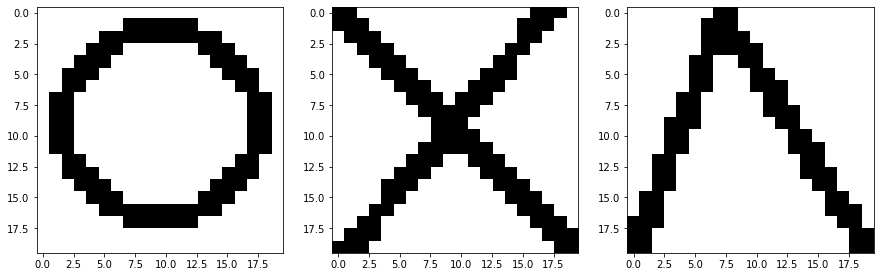

In [2]:
I1 = plt.imread('A.png')
I2 = plt.imread('B.png')
I3 = plt.imread('C.png')

# Convert rgb to binary
I1 = (np.mean(I1, axis=2) > 0.5) * 1
I2 = (np.mean(I2, axis=2) > 0.5) * 1
I3 = (np.mean(I3, axis=2) > 0.5) * 1

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I1, cmap='gray')
ax[1].imshow(I2, cmap='gray')
ax[2].imshow(I3, cmap='gray')
plt.show()

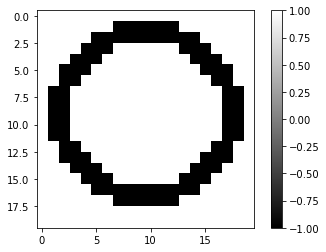

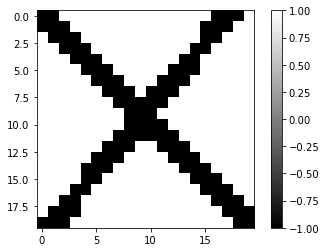

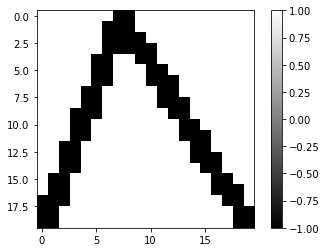

In [3]:
Width  = 20
Height = 20

NumberMemory = 3

Data = np.zeros((Width, Height, NumberMemory))

Data[:,:,0] = I1[:,:]

Data[:,:,1] = I2[:,:]

Data[:,:,2] = I3[:,:]

Data = 2 * Data - 1

for i in range(NumberMemory):
    plt.imshow(Data[:,:,i], cmap='gray')
    plt.colorbar()
    plt.show()

## Flatten the 2D images into vectors

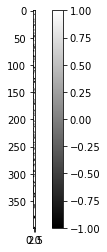

In [4]:
FlattenData = np.zeros((Width*Height, NumberMemory))

for i in range(NumberMemory):
    FlattenData[:,i] = Data[:,:,i].flatten()

plt.imshow(FlattenData, cmap='gray')
plt.colorbar()
plt.show()

## Calculate the weight matrix using Hebb's rule

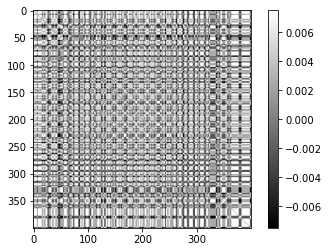

In [5]:
Weight = np.matmul(FlattenData, FlattenData.T) / (Width*Height)

for i in range(Width*Height):
    Weight[i,i] = 0

plt.imshow(Weight, cmap='gray')
plt.colorbar()
plt.show()

## Generate a test image by adding noise to a memorized image

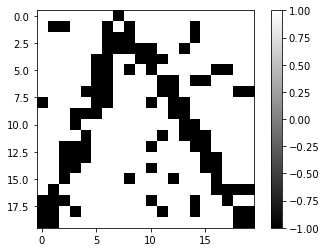

In [18]:
Input = np.zeros([Width,Height])
Input[:,:] = Data[:,:,2]

Input = Input.flatten()

for i in range(50):
    j = np.random.randint(Width*Height)
    Input[j] = Input[j] * -1

plt.imshow(Input.reshape(Width,Height), cmap='gray')
plt.colorbar()
plt.show()

## Perform Monte-Carlo energy minimization

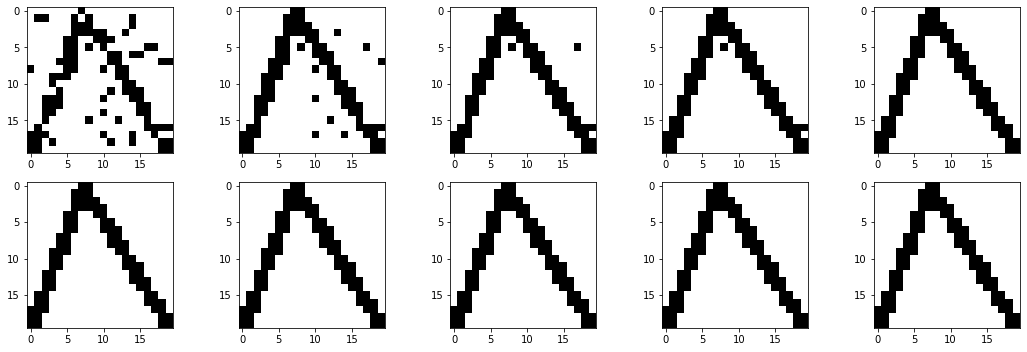

In [19]:
MaxEpoch = 10
ImagesPerRow = 5
NumberRows = int(np.round(MaxEpoch/ImagesPerRow))

fig, axs = plt.subplots( NumberRows , ImagesPerRow , figsize=(15, 5))
axs[0,0].imshow(Input.reshape(Width,Height), cmap='gray')

for Epoch in range(1,MaxEpoch):
    Row = int(np.floor(Epoch/ImagesPerRow))
    Col = int(np.round(Epoch%ImagesPerRow))
    for i in range(Width*Height):

        j = np.random.randint(Width*Height)
        Output = np.copy(Input)
        Output[j] = -1 * Output[j]

        EneryBefore = -0.5 * np.matmul(np.matmul(Input.T, Weight), Input)
        EneryAfter  = -0.5 * np.matmul(np.matmul(Output.T, Weight), Output)

        if EneryAfter < EneryBefore:
            Input = np.copy(Output)
        elif np.random.rand() < np.exp(-(EneryAfter - EneryBefore)):
            Input = np.copy(Output)

        Input[j] = np.sign(np.matmul(Weight[j,:], Input))

    axs[Row,Col].imshow(Input.reshape(Width,Height), cmap='gray')

plt.tight_layout()
plt.show()